In [1]:
import pandas as pd
import numpy as np
import json
from functools import reduce
import networkx as nx
pd.options.display.width=10000
pd.options.display.max_columns=1000
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
dfs = pd.read_json('data2018-06-01.json', lines=True, chunksize=1e5)


In [3]:
# df_list = []
# for i in dfs:
#     display(i.head())
    
#     break

In [4]:
merged_df = pd.concat(dfs)

/Users/devashishsood/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


In [5]:
display(merged_df.head())

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,extended_tweet,favorite_count,favorited,filter_level,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,limit,place,possibly_sensitive,quote_count,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,reply_count,retweet_count,retweeted,retweeted_status,source,text,timestamp_ms,truncated,user,withheld_in_countries
0,NaN,None,2018-05-31 23:59:59,NaN,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,NaN,0.0,0.0,low,None,1.002339e+18,1.002339e+18,None,NaN,NaN,NaN,NaN,1.0,en,NaN,None,0.0,0.0,{'created_at': 'Thu May 31 17:18:18 +0000 2018...,1.002238e+18,1.002238e+18,"{'url': 'https://t.co/bjIENMg0SI', 'expanded':...",0.0,0.0,0.0,{'created_at': 'Thu May 31 23:17:39 +0000 2018...,"<a href=""http://twitter.com/download/iphone"" r...",RT @MaconBlair: Am excite. https://t.co/bjIENM...,2018-05-31 23:59:59.651,0.0,"{'id': 4043015782, 'id_str': '4043015782', 'na...",NaN
1,NaN,None,2018-06-01 00:00:00,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...","{'media': [{'id': 1000957407701491712, 'id_str...",NaN,0.0,0.0,low,None,1.002339e+18,1.002339e+18,None,NaN,NaN,NaN,NaN,0.0,en,NaN,None,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,{'created_at': 'Mon May 28 04:30:19 +0000 2018...,"<a href=""http://twitter.com/download/iphone"" r...","RT @nataliemorales: Ruby, you have a ghost. Th...",2018-06-01 00:00:00.126,0.0,"{'id': 3293481125, 'id_str': '3293481125', 'na...",NaN
2,NaN,None,2018-06-01 00:00:00,NaN,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,"{'full_text': 'In this video, George Levy answ...",0.0,0.0,low,None,1.002339e+18,1.002339e+18,None,NaN,NaN,NaN,NaN,0.0,en,NaN,None,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,"<a href=""https://about.twitter.com/products/tw...","In this video, George Levy answers the followi...",2018-06-01 00:00:00.515,1.0,"{'id': 790951679793430528, 'id_str': '79095167...",NaN
3,NaN,None,2018-06-01 00:00:00,NaN,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,NaN,0.0,0.0,low,None,1.002339e+18,1.002339e+18,None,NaN,NaN,NaN,NaN,0.0,en,NaN,None,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,"<a href=""http://hez.us/"" rel=""nofollow"">HEZ.US...",What is in your Python Development Environment...,2018-06-01 00:00:00.670,0.0,"{'id': 2775766225, 'id_str': '2775766225', 'na...",NaN
4,NaN,None,2018-06-01 00:00:00,NaN,"{'hashtags': [{'text': 'Blockchain', 'indices'...",NaN,{'full_text': 'How #Blockchain will decentrali...,0.0,0.0,low,None,1.002339e+18,1.002339e+18,None,NaN,NaN,NaN,NaN,0.0,en,NaN,None,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,"<a href=""https://ads-api.twitter.com"" rel=""nof...",How #Blockchain will decentralize #healthcare?...,2018-06-01 00:00:00.768,1.0,"{'id': 119646271, 'id_str': '119646271', 'name...",NaN


In [6]:
filtered_df = merged_df.dropna(subset=['retweeted_status'])

In [7]:
filtered_df.shape

(220593, 38)

In [8]:
display(filtered_df.head())

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,extended_tweet,favorite_count,favorited,filter_level,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,limit,place,possibly_sensitive,quote_count,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,reply_count,retweet_count,retweeted,retweeted_status,source,text,timestamp_ms,truncated,user,withheld_in_countries
0,NaN,None,2018-05-31 23:59:59,NaN,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,NaN,0.0,0.0,low,None,1.002339e+18,1.002339e+18,None,NaN,NaN,NaN,NaN,1.0,en,NaN,None,0.0,0.0,{'created_at': 'Thu May 31 17:18:18 +0000 2018...,1.002238e+18,1.002238e+18,"{'url': 'https://t.co/bjIENMg0SI', 'expanded':...",0.0,0.0,0.0,{'created_at': 'Thu May 31 23:17:39 +0000 2018...,"<a href=""http://twitter.com/download/iphone"" r...",RT @MaconBlair: Am excite. https://t.co/bjIENM...,2018-05-31 23:59:59.651,0.0,"{'id': 4043015782, 'id_str': '4043015782', 'na...",NaN
1,NaN,None,2018-06-01 00:00:00,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...","{'media': [{'id': 1000957407701491712, 'id_str...",NaN,0.0,0.0,low,None,1.002339e+18,1.002339e+18,None,NaN,NaN,NaN,NaN,0.0,en,NaN,None,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,{'created_at': 'Mon May 28 04:30:19 +0000 2018...,"<a href=""http://twitter.com/download/iphone"" r...","RT @nataliemorales: Ruby, you have a ghost. Th...",2018-06-01 00:00:00.126,0.0,"{'id': 3293481125, 'id_str': '3293481125', 'na...",NaN
6,NaN,None,2018-06-01 00:00:01,NaN,"{'hashtags': [{'text': 'Treon', 'indices': [42...",NaN,NaN,0.0,0.0,low,None,1.002339e+18,1.002339e+18,None,NaN,NaN,NaN,NaN,0.0,en,NaN,None,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,{'created_at': 'Thu May 31 13:56:03 +0000 2018...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @TreonNews: Treon 'ICO' Review (Ru-1)\n\n#T...,2018-06-01 00:00:01.078,0.0,"{'id': 856573038908669952, 'id_str': '85657303...",NaN
7,NaN,None,2018-06-01 00:00:01,NaN,"{'hashtags': [{'text': 'tvrevolution', 'indice...",NaN,NaN,0.0,0.0,low,None,1.002339e+18,1.002339e+18,None,NaN,NaN,NaN,NaN,0.0,en,NaN,None,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,{'created_at': 'Tue May 29 06:55:03 +0000 2018...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @tvtwocom: Have you heard the news? https:/...,2018-06-01 00:00:01.171,0.0,"{'id': 3233586964, 'id_str': '3233586964', 'na...",NaN
8,NaN,None,2018-06-01 00:00:01,NaN,"{'hashtags': [{'text': 'B2B', 'indices': [27, ...",NaN,NaN,0.0,0.0,low,None,1.002339e+18,1.002339e+18,None,NaN,NaN,NaN,NaN,0.0,en,NaN,None,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,{'created_at': 'Wed May 30 23:32:48 +0000 2018...,"<a href=""http://twitter.com/download/iphone"" r...",RT @evankirstel: Strategic #B2B services:\n#So...,2018-06-01 00:00:01.375,0.0,"{'id': 126406947, 'id_str': '126406947', 'name...",NaN


In [9]:
users = pd.DataFrame.from_records(filtered_df["user"].values)
users.head()

,contributors_enabled,created_at,default_profile,default_profile_image,description,favourites_count,follow_request_sent,followers_count,following,friends_count,geo_enabled,id,id_str,is_translator,lang,listed_count,location,name,notifications,profile_background_color,profile_background_image_url,profile_background_image_url_https,profile_background_tile,profile_banner_url,profile_image_url,profile_image_url_https,profile_link_color,profile_sidebar_border_color,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,protected,screen_name,statuses_count,time_zone,translator_type,url,utc_offset,verified
0,False,Mon Oct 26 01:46:04 +0000 2015,True,False,22 Years Old/SJC Graduate/SC👻: chrisulrichh95,17505,None,395,None,1165,True,4043015782,4043015782,False,en,12,"Shirley, NY",Chris Ulrich,None,C0DEED,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,False,https://pbs.twimg.com/profile_banners/40430157...,http://pbs.twimg.com/profile_images/9926371586...,https://pbs.twimg.com/profile_images/992637158...,1DA1F2,C0DEED,DDEEF6,333333,True,False,ChrisUlrich95,22230,None,none,None,None,False
1,False,Thu May 21 23:40:47 +0000 2015,True,False,None,2070,None,94,None,76,False,3293481125,3293481125,False,en,0,None,Jon McDonald,None,C0DEED,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,False,https://pbs.twimg.com/profile_banners/32934811...,http://pbs.twimg.com/profile_images/9354335445...,https://pbs.twimg.com/profile_images/935433544...,1DA1F2,C0DEED,DDEEF6,333333,True,False,jonnnyMac18,459,None,none,None,None,False
2,False,Mon Apr 24 18:18:21 +0000 2017,True,False,None,1450,None,2746,None,3892,False,856573038908669952,856573038908669952,False,vi,2,United States,kids fun,None,F5F8FA,,,False,https://pbs.twimg.com/profile_banners/85657303...,http://pbs.twimg.com/profile_images/9748457091...,https://pbs.twimg.com/profile_images/974845709...,1DA1F2,C0DEED,DDEEF6,333333,True,False,KidFunny_,2608,None,none,None,None,False
3,False,Mon May 04 14:34:58 +0000 2015,False,False,#Bitcoin #Ether #Crypto #ICO #blockchain #busi...,3080,None,13406,None,14007,False,3233586964,3233586964,False,ru,33,Россия,Ирина Рыжкова,None,000000,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,False,https://pbs.twimg.com/profile_banners/32335869...,http://pbs.twimg.com/profile_images/9997720303...,https://pbs.twimg.com/profile_images/999772030...,FAB81E,000000,000000,000000,False,False,red_liska,3451,None,none,None,None,False
4,False,Thu Mar 25 19:39:13 +0000 2010,False,False,#RealEstate Broker in #Seattle #Eastside #Bell...,37762,None,4919,None,4881,True,126406947,126406947,False,en,427,"Seattle/Bellevue, WA",Stacey Cross,None,000000,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,False,https://pbs.twimg.com/profile_banners/12640694...,http://pbs.twimg.com/profile_images/1277544664...,https://pbs.twimg.com/profile_images/127754466...,666666,000000,000000,000000,False,False,Lookwherewelive,21302,None,none,http://lookwherewelive.com,None,False


In [10]:
retweets = filtered_df["retweeted_status"].apply(pd.Series)
retweets.head()

,created_at,id,id_str,text,display_text_range,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,is_quote_status,quote_count,reply_count,retweet_count,favorite_count,entities,favorited,retweeted,possibly_sensitive,filter_level,lang,extended_entities,extended_tweet,scopes,withheld_in_countries
0,Thu May 31 23:17:39 +0000 2018,1002328284158455808,1002328284158455808,Am excite. https://t.co/bjIENMg0SI,"[0, 10]","<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,None,None,"{'id': 714815460, 'id_str': '714815460', 'name...",None,None,None,None,1.002238e+18,1002237848483852289,{'created_at': 'Thu May 31 17:18:18 +0000 2018...,"{'url': 'https://t.co/bjIENMg0SI', 'expanded':...",True,2,11,2,107,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",False,False,False,low,en,NaN,NaN,NaN,NaN
1,Mon May 28 04:30:19 +0000 2018,1000957417360834560,1000957417360834560,"Ruby, you have a ghost. This is straight up te...","[0, 55]","<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,None,None,"{'id': 23405114, 'id_str': '23405114', 'name':...",None,None,None,None,NaN,NaN,NaN,NaN,False,1318,407,25415,95201,"{'hashtags': [], 'urls': [], 'user_mentions': ...",False,False,False,low,en,"{'media': [{'id': 1000957407701491712, 'id_str...",NaN,NaN,NaN
6,Thu May 31 13:56:03 +0000 2018,1002186949485096960,1002186949485096960,Treon 'ICO' Review (Ru-1)\n\n#Treon Brings Cry...,"[0, 140]","<a href=""http://bufferapp.com"" rel=""nofollow"">...",True,NaN,None,NaN,None,None,"{'id': 975433151265890304, 'id_str': '97543315...",None,None,None,None,NaN,NaN,NaN,NaN,False,9,4,161,167,"{'hashtags': [{'text': 'Treon', 'indices': [27...",False,False,False,low,en,NaN,{'full_text': 'Treon 'ICO' Review (Ru-1) #Tre...,NaN,NaN
7,Tue May 29 06:55:03 +0000 2018,1001356225534218241,1001356225534218241,Have you heard the news? https://t.co/oEFpV4TY...,NaN,"<a href=""http://www.hootsuite.com"" rel=""nofoll...",True,NaN,None,NaN,None,None,"{'id': 17713698, 'id_str': '17713698', 'name':...",None,None,None,None,NaN,NaN,NaN,NaN,False,1,0,125,136,"{'hashtags': [{'text': 'tvrevolution', 'indice...",False,False,False,low,en,NaN,{'full_text': 'Have you heard the news? https:...,NaN,NaN
8,Wed May 30 23:32:48 +0000 2018,1001969706474135552,1001969706474135552,Strategic #B2B services:\n#SocialMediaMarketin...,"[0, 140]","<a href=""http://twitter.com/download/iphone"" r...",True,NaN,None,NaN,None,None,"{'id': 35203319, 'id_str': '35203319', 'name':...",None,None,"{'id': 'db6cee8d55fe4a29', 'url': 'https://api...",None,NaN,NaN,NaN,NaN,False,0,1,18,25,"{'hashtags': [{'text': 'B2B', 'indices': [10, ...",False,False,False,low,en,NaN,{'full_text': 'Strategic #B2B services: #Socia...,NaN,NaN


In [11]:
owners = pd.DataFrame.from_records(retweets["user"].values)

In [12]:
combined = pd.concat([users['screen_name'], owners['screen_name']], axis=1, keys=['retweeter', 'tweet_owner'])
combined.head()

,retweeter,tweet_owner
0,ChrisUlrich95,MaconBlair
1,jonnnyMac18,nataliemorales
2,KidFunny_,TreonNews
3,red_liska,tvtwocom
4,Lookwherewelive,evankirstel


In [13]:
G=nx.from_pandas_edgelist(combined, "retweeter", "tweet_owner")

In [34]:
centralities = list(nx.connected_components(G))
[(len(x)) for x in centralities]

[83812,
 1,
 10,
 24,
 3461,
 2,
 3,
 2,
 2,
 200,
 4,
 9,
 36,
 2,
 4,
 2,
 2,
 4,
 2,
 2,
 5,
 2,
 1,
 2,
 5,
 6,
 11,
 3,
 2,
 13,
 896,
 7,
 4,
 3,
 2,
 88,
 16,
 5,
 2,
 2,
 1,
 15,
 3,
 2,
 4,
 1,
 2,
 13,
 1,
 2,
 3,
 2,
 2,
 14,
 9,
 6,
 25,
 2,
 11,
 2,
 2,
 3,
 2,
 2,
 2,
 3,
 4,
 8,
 2,
 3,
 6,
 4,
 9,
 14,
 7,
 6,
 3,
 3,
 2,
 2,
 5,
 12,
 5,
 2,
 8,
 2,
 7,
 2,
 2,
 3,
 1,
 2,
 2,
 6,
 3,
 3,
 2,
 26,
 33,
 2,
 2,
 3,
 21,
 18,
 2,
 1,
 2,
 6,
 2,
 1,
 2,
 2,
 2,
 123,
 26,
 11,
 2,
 2,
 2,
 4,
 3,
 5,
 3,
 2,
 3,
 2,
 18,
 1,
 16,
 328,
 7,
 3,
 3,
 15,
 47,
 2,
 21,
 10,
 3,
 2,
 3,
 2,
 2,
 3,
 5,
 5,
 6,
 2,
 4,
 2,
 2,
 2,
 3,
 2,
 2,
 6,
 5,
 4,
 2,
 2,
 3,
 2,
 4,
 2,
 2,
 2,
 11,
 6,
 2,
 2,
 2,
 3,
 4,
 2,
 2,
 5,
 1,
 10,
 5,
 2,
 2,
 10,
 2,
 2,
 2,
 11,
 4,
 6,
 9,
 2,
 2,
 2,
 2,
 10,
 5,
 2,
 4,
 11,
 2,
 2,
 8,
 4,
 2,
 2,
 2,
 5,
 85,
 39,
 2,
 3,
 2,
 3,
 2,
 8,
 3,
 3,
 5,
 2,
 4,
 2,
 2,
 2,
 3,
 3,
 1,
 2,
 2,
 2,
 1,
 14,
 6,
 2,
 3,
 3,
 3,
 26,
 2,
 

In [15]:
retweeter_or_tweet_owner_screen_names = centralities[4]

In [16]:
s = combined.loc[combined['retweeter'].isin(retweeter_or_tweet_owner_screen_names)]
s

,retweeter,tweet_owner
39,Twiterdemierda2,Astronomiaum
78,hellensrangel,AlveesYan
93,_douglas_Ksh,Astronomiaum
117,Dopiludida,Astronomiaum
120,Janaina070276,Astronomiaum
131,anacarolinapss,Astronomiaum
161,laratrz,Astronomiaum
172,Beatris67247383,Astronomiaum
191,hitstydias,Astronomiaum
195,edmare_oliveira,Astronomiaum


In [17]:
G1 = nx.from_pandas_edgelist(s, "retweeter", "tweet_owner")



In [18]:
plt.figure(1, figsize=(40, 18))
nx.draw_circular(G1, node_size=0.5, font_size=1, font_color='green', width=0.1, style='solid', with_labels=True)

#plt.show()

plt.savefig('monster.svg', format='svg')

<IPython.core.display.Javascript object>

In [19]:
plt.figure(2, figsize=(40, 18))
nx.draw_networkx(G1, node_size=0.5, font_size=1, font_color='green', width=0.1, style='solid', with_labels=True)

# plt.show(block=False)

plt.savefig('monster1.svg', format='svg')

<IPython.core.display.Javascript object>

In [20]:
plt.figure(3, figsize=(40, 18))
nx.draw_spring(G1, node_size=0.5, font_size=1, font_color='green', width=0.1, style='solid', with_labels=True)

# plt.show(block=False)

plt.savefig('monster2.svg', format='svg')

<IPython.core.display.Javascript object>

In [21]:
plt.figure(4, figsize=(40, 18))
nx.draw_spectral(G1, node_size=0.5, font_size=1, font_color='green', width=0.1, style='solid', with_labels=True)

# plt.show(block=False)

plt.savefig('monster4.svg', format='svg')

<IPython.core.display.Javascript object>

In [22]:
plt.figure(5, figsize=(40, 18))
nx.draw_kamada_kawai(G1, node_size=0.2, font_size=1, font_color='green', width=0.1, style='solid', with_labels=True)

# plt.show(block=False)

plt.savefig('monster5.svg', format='svg')

<IPython.core.display.Javascript object>

In [23]:
plt.figure(6, figsize=(40, 18))
nx.draw_shell(G1, node_size=0.5, font_size=1, font_color='green', width=0.1, style='solid', with_labels=True)

# plt.show(block=False)

plt.savefig('monster6.svg', format='svg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


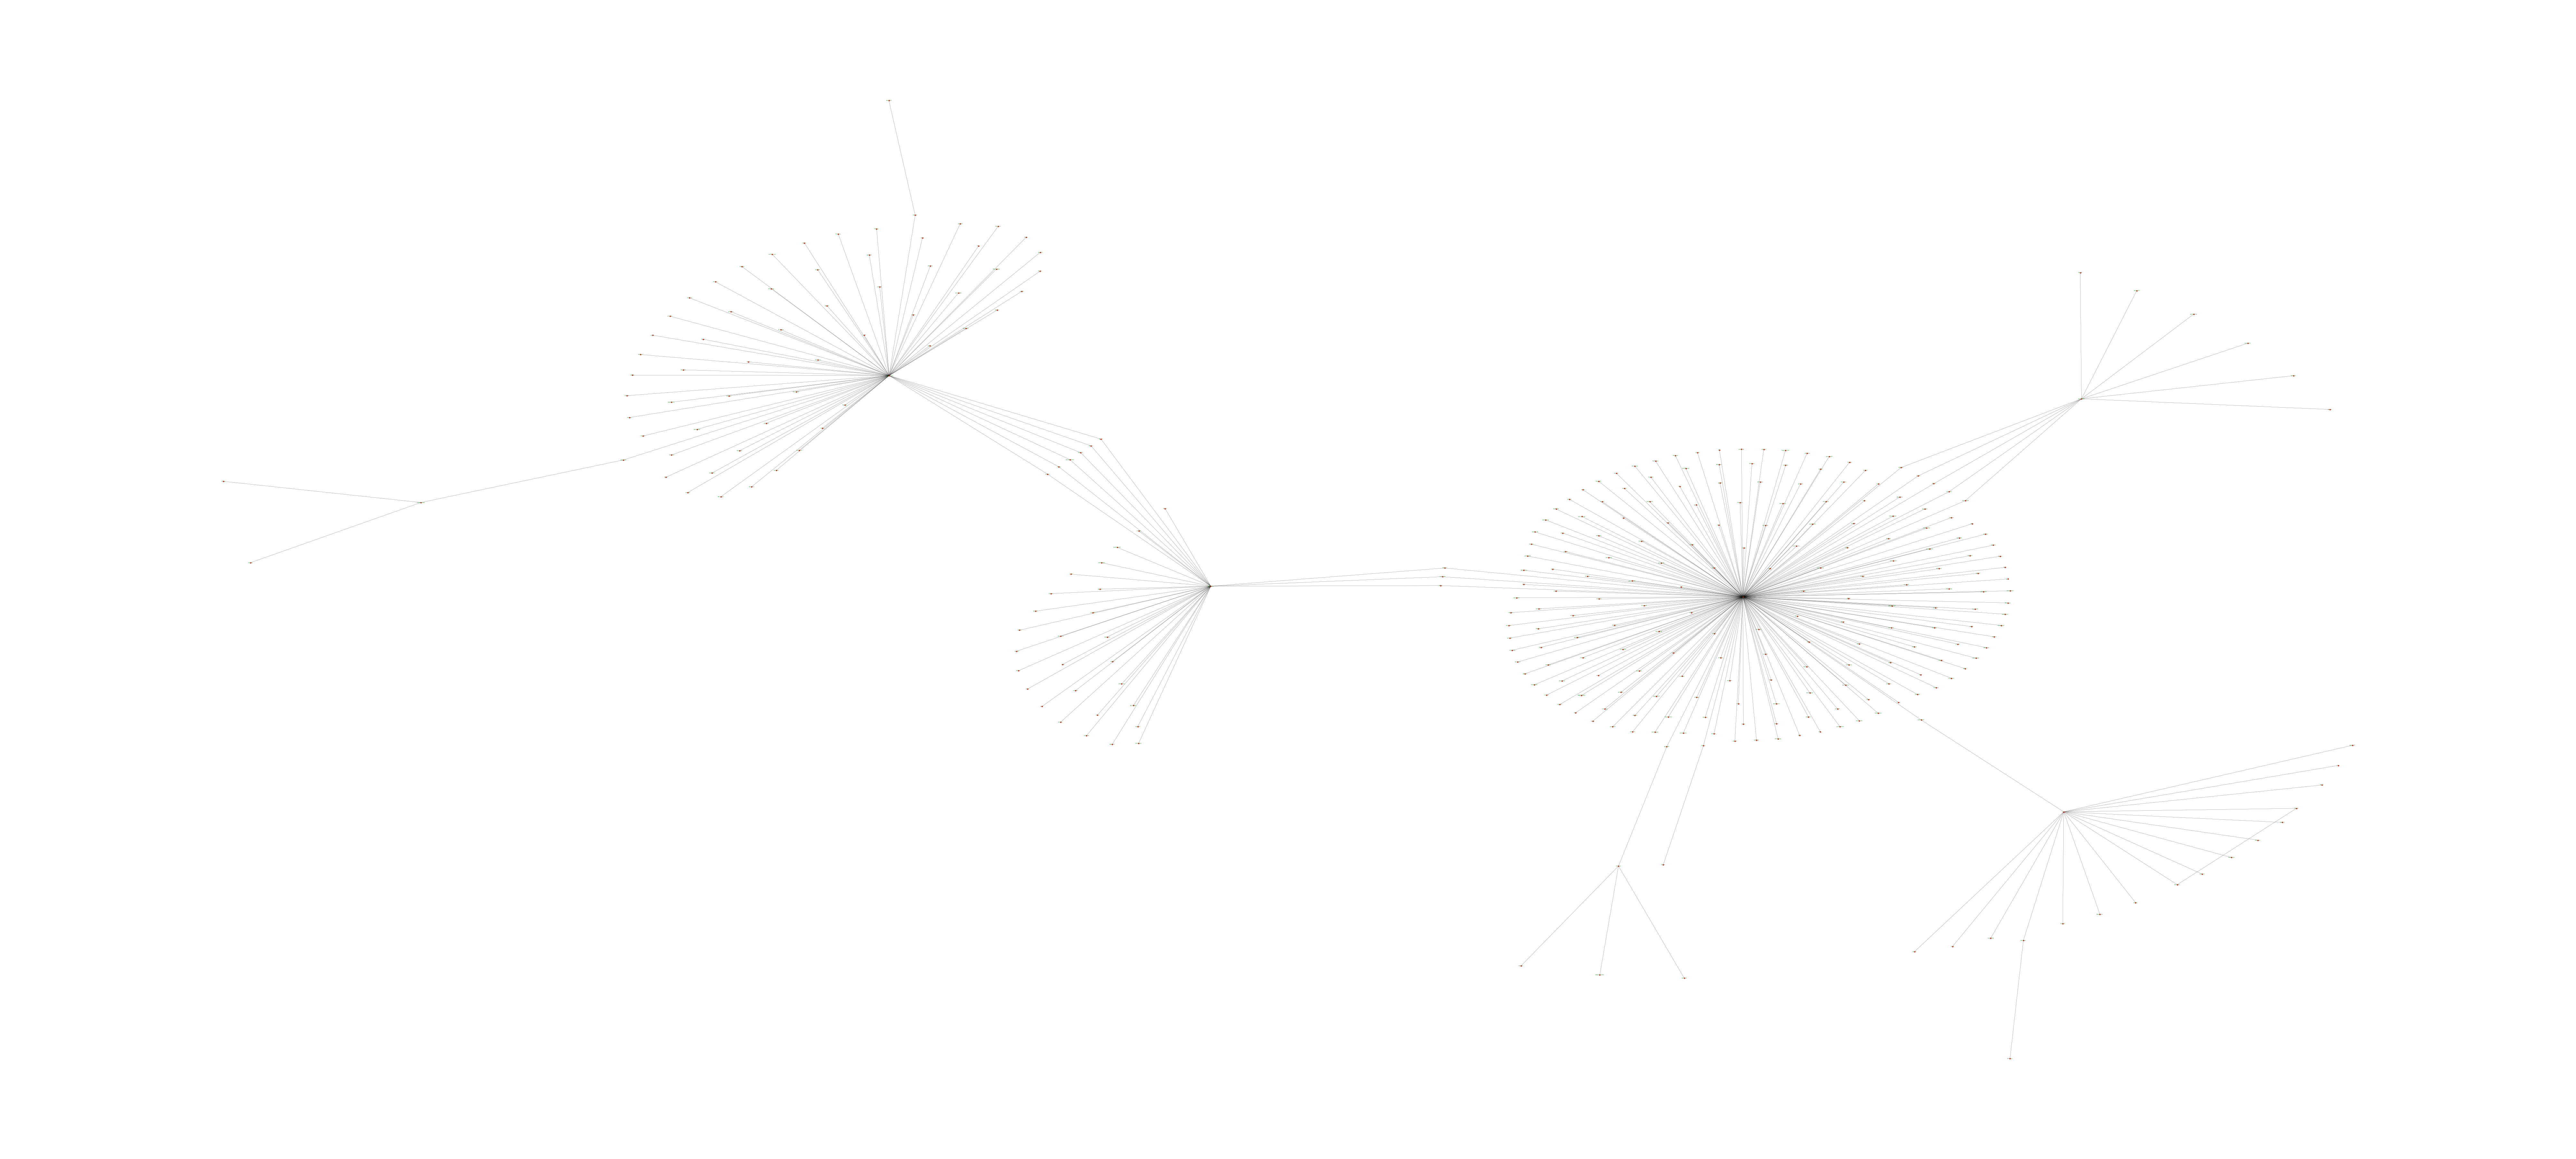

In [39]:
retweeter_or_tweet_owner_screen_names=centralities[129]
s = combined.loc[combined['retweeter'].isin(retweeter_or_tweet_owner_screen_names)]
G2 = nx.from_pandas_edgelist(s, "retweeter", "tweet_owner")

plt.figure(7, figsize=(40, 18))
nx.draw_kamada_kawai(G2, node_size=0.2, font_size=1, font_color='green', width=0.1, style='solid', with_labels=True)

# plt.show(block=False)

plt.savefig('monster7.svg', format='svg')

In [24]:
# nx.draw_networkx(G)

In [25]:
retweeted_entities = retweets["entities"].apply(pd.Series)
retweeted_entities.head()

,hashtags,urls,user_mentions,symbols,media
0,[],"[{'url': 'https://t.co/bjIENMg0SI', 'expanded_...",[],[],NaN
1,[],[],[],[],"[{'id': 1000957407701491712, 'id_str': '100095..."
6,"[{'text': 'Treon', 'indices': [27, 33]}, {'tex...","[{'url': 'https://t.co/3jX7RrSxPG', 'expanded_...",[],[],NaN
7,"[{'text': 'tvrevolution', 'indices': [52, 65]}...","[{'url': 'https://t.co/oEFpV4TY1X', 'expanded_...",[],[],NaN
8,"[{'text': 'B2B', 'indices': [10, 14]}, {'text'...","[{'url': 'https://t.co/p8jcxClGA1', 'expanded_...",[],[],NaN


In [26]:
retweet_users= retweets["user"].apply(pd.Series)
retweet_users.head()

KeyboardInterrupt: 

In [ ]:
entities = pd.DataFrame.from_records(df["entities"].values)
entities.head()

In [ ]:
entities["hashtags"].iloc[3]

In [ ]:
display(df.columns)
display(users.columns)
display(entities.columns)
display(retweets.columns)
display(retweeted_entities.columns)
display(retweet_users.columns)

In [ ]:
display(df.shape)
display(users.shape)
display(entities.shape)
display(retweets.shape)
display(retweeted_entities.shape)
display(retweet_users.shape)

In [ ]:
imp = retweets["entities"].apply(pd.Series)['user_mentions']
imp.head()

In [ ]:
combined.head()

In [ ]:
merged_df = []
combined = []
owners = []
retweets = []
centralities = []
